In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import itertools


In [144]:
df = pd.read_csv('Health_Risk_Dataset.csv')

In [145]:
df.head(10)

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low
5,P0679,20,91,2,121,98,37.8,P,1,Medium
6,P0627,16,90,1,116,96,38.4,A,0,Medium
7,P0514,17,90,1,118,107,39.0,A,0,Medium
8,P0860,31,88,1,87,107,40.7,P,0,High
9,P0137,18,98,1,127,72,36.6,A,0,Normal


In [146]:
df.info()

##Patient_ID – Unique anonymized patient identifier.
##Respiratory_Rate – Breaths per minute.
##Oxygen_Saturation – Oxygen saturation level (%) in the blood.
##O2_Scale – Oxygen therapy scale used.
##Systolic_BP – Systolic blood pressure (mmHg).
##Heart_Rate – Heart beats per minute.
##Temperature – Body temperature (°C).
##Consciousness – Level of consciousness (A = Alert, P = Pain response, C = Confusion, V = Verbal, U = Unresponsive).
##On_Oxygen – Whether the patient is on supplemental oxygen (0 = No, 1 = Yes).
##Risk_Level – Target variable (Normal, Low, Medium, High).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [147]:
df.isnull().sum()

Patient_ID           0
Respiratory_Rate     0
Oxygen_Saturation    0
O2_Scale             0
Systolic_BP          0
Heart_Rate           0
Temperature          0
Consciousness        0
On_Oxygen            0
Risk_Level           0
dtype: int64

In [148]:
df["Febre"] = (df["Temperature"] > 37.5).astype(int)
print(df["Febre"].value_counts())

Febre
1    570
0    430
Name: count, dtype: int64


In [149]:
df["Risk_Level"] = df["Risk_Level"].map({
    "Normal": "Normal",
    "Low": "Baixo",
    "Medium": "Médio",
    "High": "Alto"
})

df["Consciousness"] = df["Consciousness"].map({
    "A": "Alerta",
    "P": "Resposta à Dor",
    "C": "Confuso",
    "V": "Resposta Verbal",
    "U": "Inconsciente"
})

In [150]:

novos_nomes = {
    'Patient_ID': 'ID_Paciente',
    'Respiratory_Rate': 'Respiracao_Minuto',
    'Oxygen_Saturation': 'Saturacao_Oxigenio',
    'O2_Scale': 'Escala_O2',
    'Systolic_BP': 'Pressao_Sistolica',
    'Heart_Rate': 'Frequencia_Cardiaca',
    'Temperature': 'Temperatura',
    'Consciousness': 'Nivel_Consciencia',
    'On_Oxygen': 'Usa_Oxigenio',
    'Risk_Level': 'Nivel_Risco'
}


df.rename(columns=novos_nomes, inplace=True)
df.head(5)

,ID_Paciente,Respiracao_Minuto,Saturacao_Oxigenio,Escala_O2,Pressao_Sistolica,Frequencia_Cardiaca,Temperatura,Nivel_Consciencia,Usa_Oxigenio,Nivel_Risco,Febre
0,P0522,25,96,1,97,107,37.5,Alerta,0,Médio,0
1,P0738,28,92,2,116,151,38.5,Resposta à Dor,1,Alto,1
2,P0741,29,91,1,79,135,38.4,Alerta,0,Alto,1
3,P0661,24,96,1,95,92,37.3,Alerta,0,Médio,0
4,P0412,20,96,1,97,97,37.4,Alerta,0,Baixo,0


In [151]:
df['Usa_Oxigenio'] = df['Usa_Oxigenio'].map({0: 'Não', 1: 'Sim'}).astype(object)
df['Usa_Oxigenio'].value_counts()

Usa_Oxigenio
Não    726
Sim    274
Name: count, dtype: int64

In [152]:
escala_o2_map = {
    1: "Sem oxigênio",
    2: "Oxigênio leve",
    3: "Oxigênio moderado",
    4: "Oxigênio intenso"
}


df['Escala_O2'] = df['Escala_O2'].map(escala_o2_map)


df['Escala_O2'] = df['Escala_O2'].astype(object)

print(df['Escala_O2'].value_counts())
print(df['Escala_O2'].dtype)

Escala_O2
Sem oxigênio     876
Oxigênio leve    124
Name: count, dtype: int64
object


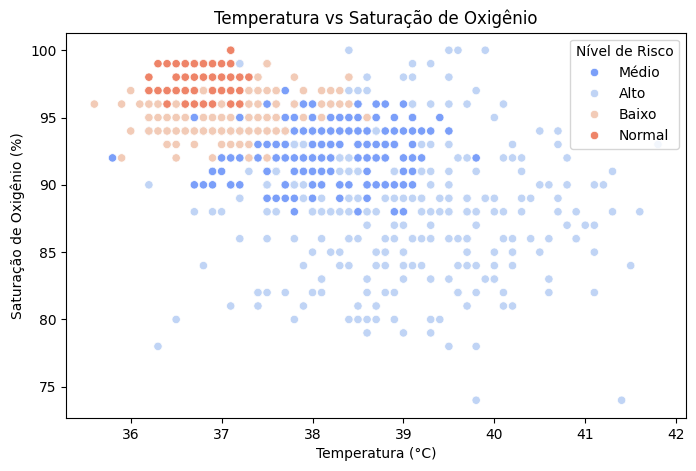

In [153]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Temperatura", y="Saturacao_Oxigenio", hue="Nivel_Risco", data=df, palette="coolwarm")
plt.title("Temperatura vs Saturação de Oxigênio")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Saturação de Oxigênio (%)")
plt.legend(title="Nível de Risco")
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_40000\36054845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Nivel_Consciencia", y="Frequencia_Cardiaca", data=df, palette="viridis")


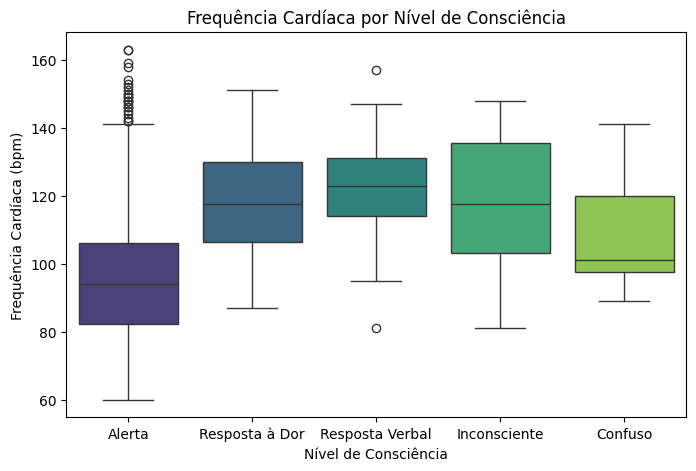

In [154]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Nivel_Consciencia", y="Frequencia_Cardiaca", data=df, palette="viridis")
plt.title("Frequência Cardíaca por Nível de Consciência")
plt.xlabel("Nível de Consciência")
plt.ylabel("Frequência Cardíaca (bpm)")
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_40000\1507711464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent.index, y=percent.values, palette="coolwarm")


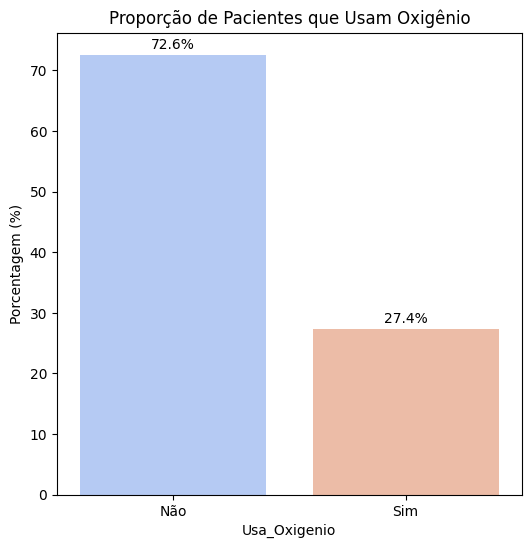

In [155]:

counts = df["Usa_Oxigenio"].value_counts()
percent = counts / counts.sum() * 100

plt.figure(figsize=(6,6))
sns.barplot(x=percent.index, y=percent.values, palette="coolwarm")
plt.ylabel("Porcentagem (%)")
plt.title("Proporção de Pacientes que Usam Oxigênio")
for i, v in enumerate(percent.values):
    plt.text(i, v+1, f"{v:.1f}%", ha='center')
plt.show()

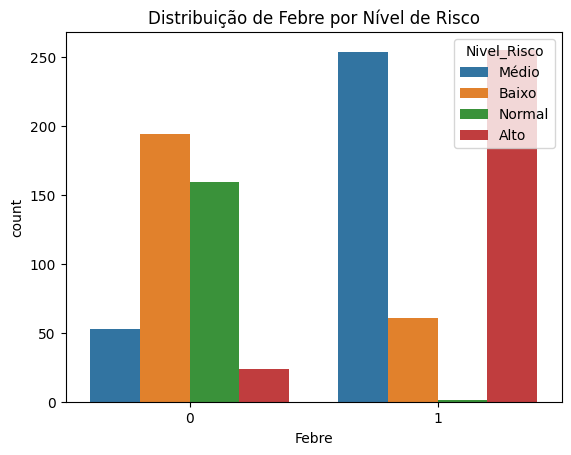


Febre
0    159
1      1
Name: count, dtype: int64


In [156]:
sns.countplot(x="Febre", hue="Nivel_Risco", data=df)
plt.title("Distribuição de Febre por Nível de Risco")
plt.show()
print()
print(df[df['Nivel_Risco'] == 'Normal']["Febre"].value_counts())

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Paciente          1000 non-null   object 
 1   Respiracao_Minuto    1000 non-null   int64  
 2   Saturacao_Oxigenio   1000 non-null   int64  
 3   Escala_O2            1000 non-null   object 
 4   Pressao_Sistolica    1000 non-null   int64  
 5   Frequencia_Cardiaca  1000 non-null   int64  
 6   Temperatura          1000 non-null   float64
 7   Nivel_Consciencia    1000 non-null   object 
 8   Usa_Oxigenio         1000 non-null   object 
 9   Nivel_Risco          1000 non-null   object 
 10  Febre                1000 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [158]:

# Variáveis contínuas
cont_vars = ["Respiracao_Minuto", "Pressao_Sistolica", "Frequencia_Cardiaca", "Temperatura"]

# Variáveis categóricas
cat_vars = ["Consiencia", "Saturacao_Oxigenio", "Escala_O2", "Febre"]

In [159]:
print("=== Correlação Pearson com Saturacao_Oxigenio ===")
for var in cont_vars:
    r, p = sts.pearsonr(df[var], df["Saturacao_Oxigenio"])
    print(f"{var}: r={r:.2f}, p-value={p:.3f}")

=== Correlação Pearson com Saturacao_Oxigenio ===
Respiracao_Minuto: r=-0.63, p-value=0.000
Pressao_Sistolica: r=0.60, p-value=0.000
Frequencia_Cardiaca: r=-0.59, p-value=0.000
Temperatura: r=-0.57, p-value=0.000


Respiratory_Rate: r = -0.63, p < 0.001
Quanto maior a frequência respiratória, menor tende a ser a saturação de O₂.
(Condiz clinicamente: respiração acelerada geralmente compensa baixa oxigenação).

Systolic_BP: r = +0.60, p < 0.001
Maior pressão sistólica tende a vir junto de maior saturação.
(Pressão adequada pode estar associada a melhor perfusão).

Heart_Rate: r = -0.59, p < 0.001
Quanto maior a frequência cardíaca, menor a saturação.
(Taquicardia muitas vezes indica esforço compensatório pela hipóxia).

Temperature: r = -0.57, p < 0.001
Temperaturas mais altas (febre) associadas a menor saturação.
(Febre aumenta consumo de O₂ e pode reduzir saturação).

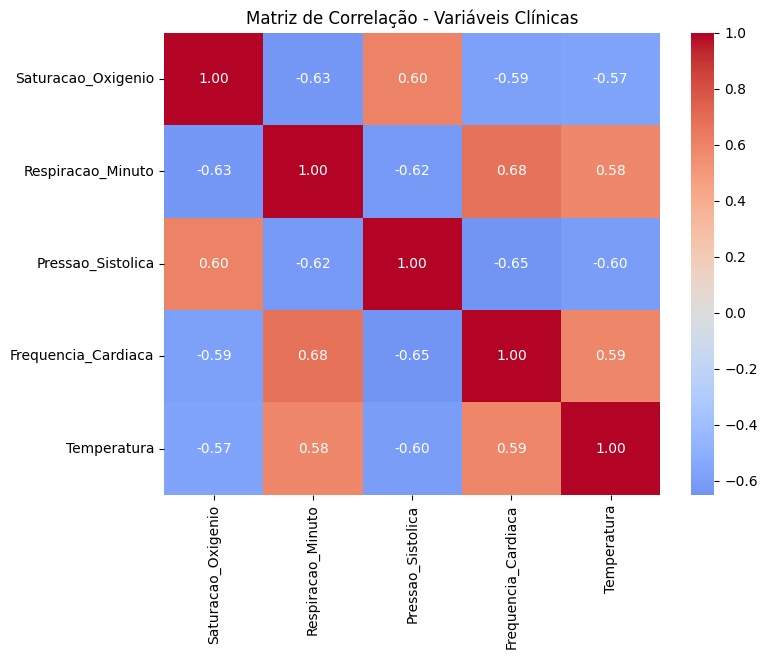

In [160]:

num_vars = ["Saturacao_Oxigenio", "Respiracao_Minuto", "Pressao_Sistolica", "Frequencia_Cardiaca", "Temperatura"]

# Matriz de correlação
corr_matrix = df[num_vars].corr(method="pearson")

# Plot do heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação - Variáveis Clínicas")
plt.show()

In [161]:
df["Usa_Oxigenio_num"] = df["Usa_Oxigenio"].map({"Sim":1, "Não":0})

print(" t-test para variáveis categóricas binárias")
for var in ["Usa_Oxigenio_num"]:  # binária
    group1 = df[df[var]==1]["Saturacao_Oxigenio"]
    group0 = df[df[var]==0]["Saturacao_Oxigenio"]
    t_stat, p = sts.ttest_ind(group1, group0)
    print(f"{var}: t={t_stat:.2f}, p-value={p:.3f}")

    ##A variável Usa_Oxigenio está fortemente associada à Saturacao_Oxigenio.

 t-test para variáveis categóricas binárias
Usa_Oxigenio_num: t=-13.50, p-value=0.000


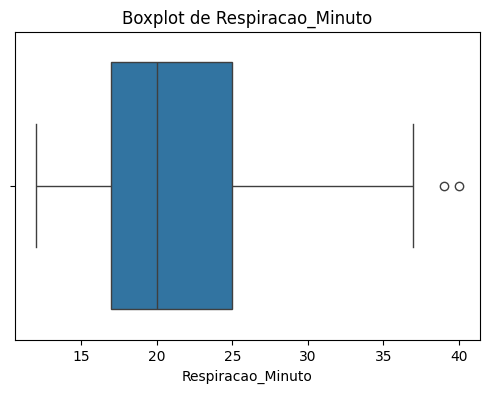

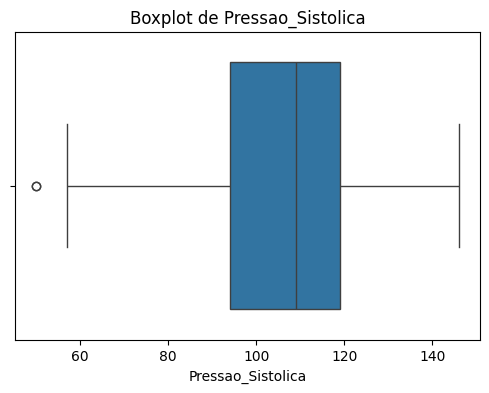

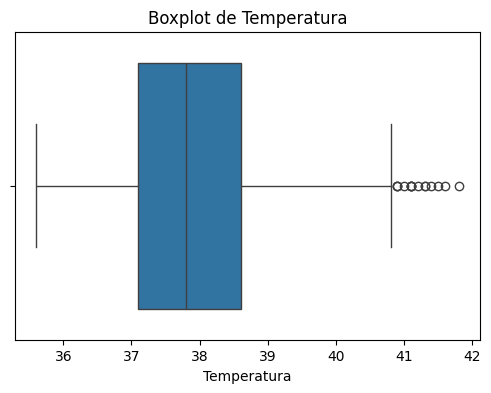

Outliers (Z-Score):
10

Respiracao_Minuto: 2 outliers encontrados pelo IQR

Pressao_Sistolica: 2 outliers encontrados pelo IQR

Temperatura: 15 outliers encontrados pelo IQR


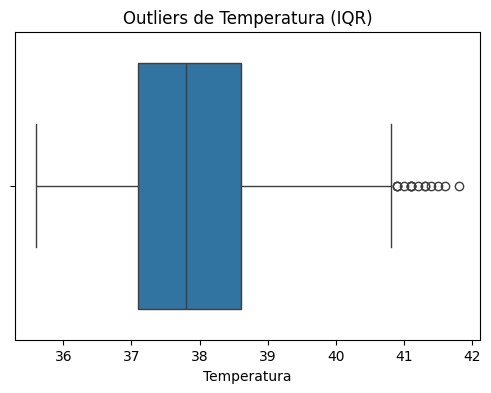

In [162]:
# Selecionar colunas para análise de outliers
cols = ["Respiracao_Minuto", "Pressao_Sistolica", "Temperatura"]


for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


z_scores = np.abs(sts.zscore(df[cols]))
outliers_zscore = (z_scores > 3)  
print("Outliers (Z-Score):")
print(outliers_zscore.sum()) 

outliers_iqr = {}
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    outliers_iqr[col] = df[col][mask]
    print(f"\n{col}: {mask.sum()} outliers encontrados pelo IQR")


plt.figure(figsize=(6,4))
sns.boxplot(x=df["Temperatura"])
plt.title("Outliers de Temperatura (IQR)")
plt.show()

Febre e saturação de oxigênio


H0: A média de Saturacao_Oxigenio é igual para pacientes com Febre=0 e Febre=1.

H1: A média de Saturacao_Oxigenio difere entre pacientes com e sem febre.

Uso de oxigênio e pressão sistólica


H0: A média de Pressao_Sistolica é igual entre pacientes que usam oxigênio e que não usam.

H1: A média de Pressao_Sistolica difere entre os grupos.

Nível de consciência e frequência cardíaca


H0: A média de Frequencia_Cardiaca é igual para todos os níveis de Nivel_Consciencia.

H1: Pelo menos um nível de Nivel_Consciencia tem média diferente.

Risco e temperatura


H0: A média de Temperatura é igual entre os níveis de Nivel_Risco.

H1: Pelo menos um nível de Nivel_Risco tem média diferente.

In [163]:
# --- Febre vs Saturacao_Oxigenio ---
grupo0 = df[df['Febre']==0]['Saturacao_Oxigenio']
grupo1 = df[df['Febre']==1]['Saturacao_Oxigenio']

t_stat, p_val = sts.ttest_ind(grupo0, grupo1, equal_var=False)
if p_val < 0.05:
    print(f"Febre vs Saturacao_Oxigenio\n  H0 rejeitada (p={p_val:.4f}): Médias diferentes entre 0 e 1\n")
else:
    print(f"Febre vs Saturacao_Oxigenio\n  H0 não rejeitada (p={p_val:.4f})\n")

# --- Uso de oxigenio vs Pressao_Sistolica ---
grupo0 = df[df['Usa_Oxigenio']=='Não']['Pressao_Sistolica']
grupo1 = df[df['Usa_Oxigenio']=='Sim']['Pressao_Sistolica']

t_stat, p_val = sts.ttest_ind(grupo0, grupo1, equal_var=False)
if p_val < 0.05:
    print(f"Uso de oxigenio vs Pressao_Sistolica\n  H0 rejeitada (p={p_val:.4f}): Médias diferentes entre Não e Sim\n")
else:
    print(f"Uso de oxigenio vs Pressao_Sistolica\n  H0 não rejeitada (p={p_val:.4f})\n")

# --- Nivel de consciencia vs Frequencia_Cardiaca ---

g1 = df[df['Nivel_Consciencia']=='Alerta']['Frequencia_Cardiaca']
g2 = df[df['Nivel_Consciencia']=='Inconsciente']['Frequencia_Cardiaca']

t_stat, p_val = sts.ttest_ind(g1, g2, equal_var=False)
if p_val < 0.05:
    print(f"Nivel_Consciencia vs Frequencia_Cardiaca\n  H0 rejeitada (p={p_val:.4f}): Médias diferentes entre Alerta e Inconsciente\n")
else:
    print(f"Nivel_Consciencia vs Frequencia_Cardiaca\n  H0 não rejeitada (p={p_val:.4f})\n")

# --- Nivel de risco vs Temperatura ---

g1 = df[df['Nivel_Risco']=='Normal']['Temperatura']
g2 = df[df['Nivel_Risco']=='Alto']['Temperatura']

t_stat, p_val = sts.ttest_ind(g1, g2, equal_var=False)
if p_val < 0.05:
    print(f"Nivel_Risco vs Temperatura\n  H0 rejeitada (p={p_val:.4f}): Médias diferentes entre Normal e Alto\n")
else:
    print(f"Nivel_Risco vs Temperatura\n  H0 não rejeitada (p={p_val:.4f})\n")

Febre vs Saturacao_Oxigenio
  H0 rejeitada (p=0.0000): Médias diferentes entre 0 e 1

Uso de oxigenio vs Pressao_Sistolica
  H0 rejeitada (p=0.0000): Médias diferentes entre Não e Sim

Nivel_Consciencia vs Frequencia_Cardiaca
  H0 rejeitada (p=0.0000): Médias diferentes entre Alerta e Inconsciente

Nivel_Risco vs Temperatura
  H0 rejeitada (p=0.0000): Médias diferentes entre Normal e Alto



In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df[["Respiracao_Minuto", "Pressao_Sistolica", "Frequencia_Cardiaca", "Temperatura"]]
y = df["Saturacao_Oxigenio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficientes: [-0.24573912  0.04857253 -0.03089631 -0.74240855]
Intercepto: 123.94807041271602
R²: 0.583222297954282
RMSE: 3.07303040727434


In [165]:
#Testando Outras colunas

def ttest_print(grupo_col, target_col):

    niveis = df[grupo_col].dropna().unique()

    if len(niveis) == 2:
        g0 = df[df[grupo_col]==niveis[0]][target_col].dropna()
        g1 = df[df[grupo_col]==niveis[1]][target_col].dropna()
        t_stat, p_val = sts.ttest_ind(g0, g1)
        print(f"{grupo_col} vs {target_col}")
        if p_val < 0.05:
            print(f"  H0 rejeitada (p={p_val:.4f}): Médias diferentes entre {niveis[0]} e {niveis[1]}")
        else:
            print(f"  H0 não rejeitada (p={p_val:.4f})")
        print()
    else:
       
        print(f"{grupo_col} vs {target_col} (comparação por pares)")
        for n1, n2 in itertools.combinations(niveis, 2):
            g0 = df[df[grupo_col]==n1][target_col].dropna()
            g1 = df[df[grupo_col]==n2][target_col].dropna()
            t_stat, p_val = sts.ttest_ind(g0, g1)
            if p_val < 0.05:
                print(f"  H0 rejeitada entre {n1} e {n2} (p={p_val:.4f})")
        print()

# --- Testes das hipóteses ---
ttest_print("Febre", "Saturacao_Oxigenio")
ttest_print("Usa_Oxigenio", "Pressao_Sistolica")
ttest_print("Nivel_Consciencia", "Frequencia_Cardiaca")
ttest_print("Nivel_Risco", "Temperatura")

Febre vs Saturacao_Oxigenio
  H0 rejeitada (p=0.0000): Médias diferentes entre 0 e 1

Usa_Oxigenio vs Pressao_Sistolica
  H0 rejeitada (p=0.0000): Médias diferentes entre Não e Sim

Nivel_Consciencia vs Frequencia_Cardiaca (comparação por pares)
  H0 rejeitada entre Alerta e Resposta à Dor (p=0.0000)
  H0 rejeitada entre Alerta e Resposta Verbal (p=0.0000)
  H0 rejeitada entre Alerta e Inconsciente (p=0.0000)

Nivel_Risco vs Temperatura (comparação por pares)
  H0 rejeitada entre Médio e Alto (p=0.0000)
  H0 rejeitada entre Médio e Baixo (p=0.0000)
  H0 rejeitada entre Médio e Normal (p=0.0000)
  H0 rejeitada entre Alto e Baixo (p=0.0000)
  H0 rejeitada entre Alto e Normal (p=0.0000)
  H0 rejeitada entre Baixo e Normal (p=0.0000)



Variável	Coeficiente	Interpretação

Respiracao_Minuto	-0.2457	Se a respiração por minuto aumenta em 1, a saturação de oxigênio diminui, em média, 0.2457%.

Pressao_Sistolica	0.0486	Se a pressão sistólica aumenta em 1 mmHg, a saturação aumenta, em média, 0.0486%.

Frequencia_Cardiaca	-0.0309	Se a frequência cardíaca aumenta em 1 bpm, a saturação diminui 0.0309%, em média.

Temperatura	-0.7424	Se a temperatura corporal aumenta 1°C, a saturação diminui 0.7424%, em média.

RMSE = 3.07 o erro médio de previsão é em torno de 3 pontos percentuais

Saturacao_Oxigenio≈123.95−0.246⋅Respiracao+0.049⋅Pressao−0.031⋅Frequencia−0.742⋅Temperatura

In [166]:
import statsmodels.api as sm


X = df[['Temperatura', 'Frequencia_Cardiaca']]
X = sm.add_constant(X)  
y = df['Saturacao_Oxigenio']
modelo = sm.OLS(y, X).fit()

# Previsão
novo = pd.DataFrame({'Temperatura':[37], 'Frequencia_Cardiaca':[80]})
novo = sm.add_constant(novo, has_constant='add') 
novo = novo[X.columns]  
pred = modelo.get_prediction(novo)
print(pred.summary_frame(alpha=0.05))  


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  95.473406  0.152421      95.174303      95.772508     88.774539   

   obs_ci_upper  
0    102.172273  



mean-	Valor previsto da saturação de oxigênio

mean_se-	Erro padrão da média prevista

mean_ci_lower-	Limite inferior do intervalo de confiança da média (IC 95%)

mean_ci_upper-	Limite superior do IC da média

obs_ci_lower-	Limite inferior do intervalo de predição (para nova observação)

obs_ci_upper-	Limite superior do intervalo de predição

Temperatura e saturação de oxigênio

H0: A correlação entre Temperatura e Saturacao_Oxigenio é zero.

H1: A correlação é diferente de zero.

Frequência respiratória e pressão sistólica

H0: A correlação entre Porcentagem_Respiratoria e Pressao_Sistolica é zero.

H1: A correlação é diferente de zero.

In [167]:
from scipy.stats import pearsonr

# --- Temperatura vs Saturacao_Oxigenio ---
x = df['Temperatura'].dropna()
y = df['Saturacao_Oxigenio'].dropna()

# Para garantir alinhamento, pegamos só os índices comuns
common_index = x.index.intersection(y.index)
x = x.loc[common_index]
y = y.loc[common_index]

r, p_val = pearsonr(x, y)
if p_val < 0.05:
    print(f"Temperatura vs Saturacao_Oxigenio\n  H0 rejeitada (p={p_val:.4f}): Correlação diferente de zero, r={r:.2f}\n")
else:
    print(f"Temperatura vs Saturacao_Oxigenio\n  H0 não rejeitada (p={p_val:.4f}): Sem evidência de correlação, r={r:.2f}\n")

# --- Porcentagem_Respiratoria vs Pressao_Sistolica ---
x = df['Respiracao_Minuto'].dropna()
y = df['Pressao_Sistolica'].dropna()

common_index = x.index.intersection(y.index)
x = x.loc[common_index]
y = y.loc[common_index]

r, p_val = pearsonr(x, y)
if p_val < 0.05:
    print(f"Respiracao_Minuto vs Pressao_Sistolica\n  H0 rejeitada (p={p_val:.4f}): Correlação diferente de zero, r={r:.2f}\n")
else:
    print(f"Respiracao_Minuto vs Pressao_Sistolica\n  H0 não rejeitada (p={p_val:.4f}): Sem evidência de correlação, r={r:.2f}\n")


Temperatura vs Saturacao_Oxigenio
  H0 rejeitada (p=0.0000): Correlação diferente de zero, r=-0.57

Respiracao_Minuto vs Pressao_Sistolica
  H0 rejeitada (p=0.0000): Correlação diferente de zero, r=-0.62



Uso de oxigênio e risco

H0: Nivel_Risco é independente de Usa_Oxigenio.

H1: Há associação entre risco e uso de oxigênio.

Febre e nível de consciência

H0: Febre é independente de Nivel_Consciencia.

H1: Há associação entre febre e nível de consciência.

Oxigênio e nível de consciência

H0: Usa_Oxigenio é independente de Nivel_Consciencia.

H1: Há associação entre uso de oxigênio e nível de consciência.

In [168]:
tabela1 = pd.crosstab(df['Usa_Oxigenio'], df['Nivel_Risco'])
chi2, p, dof, expected = sts.chi2_contingency(tabela1)
if p < 0.05:
    print(f"Uso de Oxigênio × Nivel_Risco\n  H0 rejeitada (p={p:.4f}): Há associação entre risco e uso de oxigênio\n")
else:
    print(f"Uso de Oxigênio × Nivel_Risco\n  H0 não rejeitada (p={p:.4f}): Sem evidência de associação\n")

# --- Febre × Nivel_Consciencia ---
tabela2 = pd.crosstab(df['Febre'], df['Nivel_Consciencia'])
chi2, p, dof, expected = sts.chi2_contingency(tabela2)
if p < 0.05:
    print(f"Febre × Nivel_Consciencia\n  H0 rejeitada (p={p:.4f}): Há associação entre febre e nível de consciência\n")
else:
    print(f"Febre × Nivel_Consciencia\n  H0 não rejeitada (p={p:.4f}): Sem evidência de associação\n")

# --- Usa_Oxigenio × Nivel_Consciencia ---
tabela3 = pd.crosstab(df['Usa_Oxigenio'], df['Nivel_Consciencia'])
chi2, p, dof, expected = sts.chi2_contingency(tabela3)
if p < 0.05:
    print(f"Uso de Oxigênio × Nivel_Consciencia\n  H0 rejeitada (p={p:.4f}): Há associação entre uso de oxigênio e nível de consciência\n")
else:
    print(f"Uso de Oxigênio × Nivel_Consciencia\n  H0 não rejeitada (p={p:.4f}): Sem evidência de associação\n")

Uso de Oxigênio × Nivel_Risco
  H0 rejeitada (p=0.0000): Há associação entre risco e uso de oxigênio

Febre × Nivel_Consciencia
  H0 rejeitada (p=0.0000): Há associação entre febre e nível de consciência

Uso de Oxigênio × Nivel_Consciencia
  H0 rejeitada (p=0.0000): Há associação entre uso de oxigênio e nível de consciência



In [169]:
numeric_cols = ["Respiracao_Minuto", "Saturacao_Oxigenio", "Pressao_Sistolica",
                "Frequencia_Cardiaca", "Temperatura"]

print(" Testes de Hipótese (t-test) ")
for col in numeric_cols:
    series = df[col].dropna()
    t_stat, p_val = sts.ttest_1samp(series, popmean=True)  # testando contra a média da amostra
    print(f"{col}: t={t_stat:.2f}, p-value={p_val:.3f}")

 Testes de Hipótese (t-test) 
Respiracao_Minuto: t=122.67, p-value=0.000
Saturacao_Oxigenio: t=647.51, p-value=0.000
Pressao_Sistolica: t=185.80, p-value=0.000
Frequencia_Cardiaca: t=156.49, p-value=0.000
Temperatura: t=1048.35, p-value=0.000


In [170]:
categorical_cols = ["Nivel_Risco", "Nivel_Consciencia", "Usa_Oxigenio"]
numeric_cols = ["Respiracao_Minuto", "Saturacao_Oxigenio", "Pressao_Sistolica",
                "Frequencia_Cardiaca", "Temperatura"]

def intervalo_confianca_media(series, alpha=0.05):
    series = series.dropna()
    n = len(series)
    media = series.mean()
    se = sts.sem(series) 
    h = se * sts.t.ppf(1 - alpha/2, n-1)
    return media, media - h, media + h

print(" Intervalos de Confiança das Variáveis Numéricas ")
print()
for col in numeric_cols:
    media, ic_inf, ic_sup = intervalo_confianca_media(df[col])
    print(f"{col}: Média={media:.2f}, IC95%=({ic_inf:.2f}, {ic_sup:.2f})")

 Intervalos de Confiança das Variáveis Numéricas 

Respiracao_Minuto: Média=21.51, IC95%=(21.18, 21.84)
Saturacao_Oxigenio: Média=92.59, IC95%=(92.31, 92.87)
Pressao_Sistolica: Média=106.16, IC95%=(105.05, 107.27)
Frequencia_Cardiaca: Média=98.46, IC95%=(97.24, 99.68)
Temperatura: Média=37.92, IC95%=(37.85, 37.99)


Variável-	Média-	IC 95%

Respiracao_Minuto-	21.51-	(21.18, 21.84)

Saturacao_Oxigenio-	92.59-	(92.31, 92.87)

Pressao_Sistolica-	106.16-	(105.05, 107.27)

Frequencia_Cardiaca-	98.46-	(97.24, 99.68)

Temperatura-	37.92-	(37.85, 37.99)


In [171]:

df["Usa_Oxigenio_num"] = df["Usa_Oxigenio"].map({"Sim":1, "Não":0})

def ic_proporcao(series, alpha=0.05):
    series = series.dropna()
    n = len(series)
    p_hat = series.mean()  
    z = sts.norm.ppf(1 - alpha/2)
    h = z * np.sqrt(p_hat * (1 - p_hat) / n)
    return p_hat, p_hat - h, p_hat + h

p_hat, ic_inf, ic_sup = ic_proporcao(df["Usa_Oxigenio_num"])
print(f"Usa_Oxigenio: Proporção={p_hat:.2f}, IC95%=({ic_inf:.2f}, {ic_sup:.2f})")

Usa_Oxigenio: Proporção=0.27, IC95%=(0.25, 0.30)


Usa_Oxigenio

Proporção = 0.27

IC95% = (0.25, 0.30)

Modelos de Regressao Linear

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Lista das variáveis numéricas
numeric_cols = ["Respiracao_Minuto", "Saturacao_Oxigenio",
                "Pressao_Sistolica", "Frequencia_Cardiaca", "Temperatura"]

resultados = {}

for target in numeric_cols:
   
    X_cols = [col for col in numeric_cols if col != target]
    X = df[X_cols]
    y = df[target]

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   
    model = LinearRegression()
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

   
    resultados[target] = {
        "coeficientes": dict(zip(X_cols, model.coef_)),
        "intercepto": model.intercept_,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }


for target, res in resultados.items():
    print(f"\n Modelo para {target} \n")
    print("Intercepto:", round(res["intercepto"], 3))
    print("Coeficientes:")
    for col, coef in res["coeficientes"].items():
        print(f"  {col}: {coef:.3f}")
    print(f"R²: {res['R2']:.3f}")
    print(f"RMSE: {res['RMSE']:.3f}")



 Modelo para Respiracao_Minuto 

Intercepto: 26.212
Coeficientes:
  Saturacao_Oxigenio: -0.288
  Pressao_Sistolica: -0.058
  Frequencia_Cardiaca: 0.094
  Temperatura: 0.497
R²: 0.578
RMSE: 3.548

 Modelo para Saturacao_Oxigenio 

Intercepto: 123.948
Coeficientes:
  Respiracao_Minuto: -0.246
  Pressao_Sistolica: 0.049
  Frequencia_Cardiaca: -0.031
  Temperatura: -0.742
R²: 0.583
RMSE: 3.073

 Modelo para Pressao_Sistolica 

Intercepto: 220.578
Coeficientes:
  Respiracao_Minuto: -0.710
  Saturacao_Oxigenio: 0.695
  Frequencia_Cardiaca: -0.232
  Temperatura: -3.706
R²: 0.575
RMSE: 12.210

 Modelo para Frequencia_Cardiaca 

Intercepto: 26.336
Coeficientes:
  Respiracao_Minuto: 1.329
  Saturacao_Oxigenio: -0.510
  Pressao_Sistolica: -0.267
  Temperatura: 3.145
R²: 0.578
RMSE: 13.002

 Modelo para Temperatura 

Intercepto: 42.443
Coeficientes:
  Respiracao_Minuto: 0.028
  Saturacao_Oxigenio: -0.049
  Pressao_Sistolica: -0.017
  Frequencia_Cardiaca: 0.013
R²: 0.476
RMSE: 0.777
